## Ecuaciones Diferenciales Ordinarias

#### Oscar Reula

In [1]:
using Plots
using LaTeXStrings

### El Problema y la aproximación de Euler

Trataremos de obtener aproximaciones a las soluciones de la ecuación:

\begin{equation}
\frac{dy}{dt} = f(y)
\end{equation}

Por el momento no hemos puesto una dependencia explícita de $f$ con la variable $t$. Estos sistemas se llaman autónomos. El agregado de la dependencia explícita de la variable $t$ se puede hacer fácilmente mientras que su inclusión sólo hace la notación más difícil de seguir a lo largo de todas las cuentas.
Supondremos que $f(\cdot)$ es varias veces contínuamente diferenciable de acuerdo a las necesidades de los métodos a desarrollar.

La teoría de las ecuaciones diferenciales ordinarias nos dice que: 

Dado un valor $y_0$ en el dominio de definición de $f(\cdot)$ habrá un intervalo finito $[0,T]$ donde una solución $y(t)$ existe con $y(0) = y_0$. Queremos encontrar aproximaciones arbitrariamente cercanas a $y(t)$. Esto es, queremos encontrar una norma y una sucesión de aproximaciones,  
$
\{\tilde{w}_i(t)\}
$ 
tales que: 

$$
|| y - \tilde{w}_i|| \to 0 \;\;\; \text{cuando} \;\; i \to \infty
$$.

En la práctica no trabajaremos con las funciones $\tilde{w}_i$, sino que lo haremos con una sucesión finita de valores
 ${w^n_i}$ tales que  $\tilde{w}_i$ es una interpolación de dichos puntos, es decir: $\tilde{w}_i(t_n) = w^n$, para algunos valores específicos $\{t_n\} \in [0,T], n=1,\dots, N$.

Para simplificar las cuentas supondremos que el conjunto $\{t_n\} \in [0,T]$ consiste de puntos equiespaciados, 
$$
t_n = (n-1)*\Delta t \;\;\;\;\;\;\;\;\;\;\;\;\;\; \Delta t = T/(N-1).
$$

En la práctica esto no es siempre así ya que en muchos casos se utilizan pasos tales que nos den una cierta cota de error y como el error depende de la los valores de $f$ y sus derivadas el paso de integración dependerá de ellos y por lo tanto de $t$, es decir se *adaptará* al problema. La generalización a paso variable es bastante directa. 

La aproximación más simple es suponer la aproximación de Taylor de primer orden: Conociendo el valor de $w^n$ podemos usar Taylor para aproximar el valor de $w^{n+1}$,

$$
y(t_{n+1}) = y(t_n + \Delta t) \approx y(t_n) + \frac{dy}{dt}|_{y(t)=y(t_n)} \Delta t +  \frac{d^2y}{dt^2}(\zeta)\Delta t^2  \approx y(t_n) + f(y(t_n)) \Delta t \;\;\;\;\;\;\; \zeta \in [y(t_n), y(t_{n+1})]
$$

Consideraremos entonces la aproximación;
$$
w^{n+1} = w^n +  f(w^n) \Delta t. 
$$

Dado $w^1 = y_0$ esto nos da una sucesión única y finita de puntos $\{w^n\}, n = 1, \dots, N$. 
A partir de esa sucesión se construye la interpolación $\tilde{w}_N$. 

Este método es llamado de *Euler explícito*.

### Error del paso: 

El error de un paso se define como el error que se comete en cada paso de la iteración, suponiendo que el error en el paso anterior es cero. Esta es obviamente una suposición falsa, pero luego veremos como dejarla de lado.

$$
\begin{array}{ll}
e^n &= y(t_n) - w^n = y(t_{n-1}) +   \frac{dy}{dt}|_{y = y(t_{n-1}) } \Delta t  + \frac{d^2y}{dt^2}|_{y=\zeta} \frac{\Delta t^2}{2} - w^{n-1} - f(w^{n-1}) \Delta t  \\
&= e^{n-1} + [f(y(t_{n-1})) - f(w^{n-1})] \Delta t + \frac{d^2y}{dt^2}|_{y=\zeta} \frac{\Delta t^2}{2}
\end{array}
$$

Donde nuevamente hemos usado el teorema del valor medio para la derivada segunda. Suponiendo ahora que $e^{n-1}=0$, obtenemos,

$$
|e^n| = |y(t_n) - w^n| \leq R \Delta t^2 
$$

donde,

$$
R = \max_{t \in [0,T]} \| \frac{1}{2}\frac{d^2y}{dt^2}|_{t}\|
$$

Como vamos a cometer un error de orden $\Delta t^2$ en cada paso temporal e iremos tomando $N = \frac{T}{\Delta t}$ pasos, el *error global* será orden $\Delta t$. Es decir el método de Euler es de primer orden. 

#### Ejemplo:

Aplicaremos el método de Euler a la ecuación:

$$
\frac{dy}{dt} = \lambda y
$$

La solución es $y(t) = y_0 e^{\lambda t}$ 

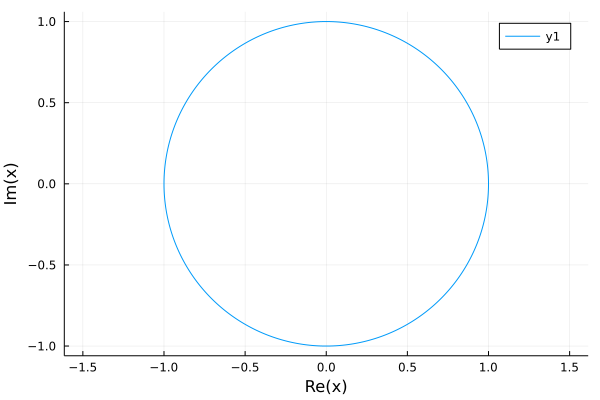

In [2]:
λ = 0.00 + im
xr = 0.0:0.01:10π
plot(exp.(λ*xr), aspectratio=1)

en particular si tomamos $\lambda = i$ la solución es acotada por el valor de $y_0$ y está dada por 

$$
y(t) = y_0 e^{it} = y_0\;(cos(t) + i \; sin(t))
$$

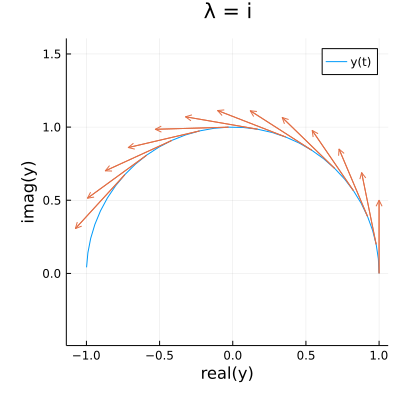

In [3]:
t = 0:0.1:π
xv = cos.(t)
yv = sin.(t)
ts = 0:0.2:(π-0.6)
xs = cos.(ts)
ys = sin.(ts)
dt = 0.5
vx = -dt.*sin.(ts)
vy = dt.*cos.(ts);
plt = plot(xv,yv,size=(400,400), aspectratio=1, title="λ = i", label="y(t)",xlabel="real(y)", ylabel="imag(y)")
quiver!(plt,xs,ys,quiver=(vx,vy), label="λ*y(t) en y(t)")
current()
#png(plt, "vector_field")


El algoritmo de Euler nos dará la siguiente aproximación:

$$
w^{n+1} = w^{n} + \lambda w^n \Delta t = (1 + \lambda  \Delta t) w^n
$$

cuya solución es: 

$$
w^n = (1 + \lambda  \Delta t)^{(n-1)} w^1
$$

con un error local dado por $\frac{|\lambda \Delta t|^2}{2} \max_{t \in [0,T]}||e^{\lambda t}||$. 

Vemos en el gráfico que aún con $\lambda = i$, y por lo tanto con $|e^{\lambda t}| = 1$ el error es muy grande.

De echo, para  $\lambda = i$,  

$$|1 + \lambda \Delta t| = \sqrt{(1+i \Delta t)(1-i \Delta t)} = \sqrt{1 + \Delta t^2} > 1.
$$

Y por lo tanto hay una amplificación de la solución para cualquier $\Delta t >0$. 

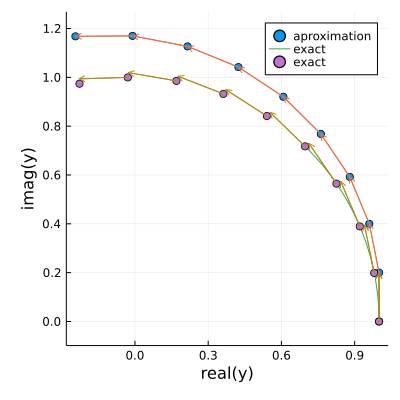

In [4]:
ts = 0:0.01:π/3.8
xs = cos.(ts)
ys = sin.(ts)

dt = 0.2
N = 10
xvv = zeros(N)
yvv = zeros(N)
vx = zeros(N)
vy = zeros(N)
xvv[1] = 1.0
yvv[1] = 0.0

for i in 2:N
    vx[i-1] = -dt*yvv[i-1]
    vy[i-1] = dt*xvv[i-1]
    xvv[i] = xvv[i-1] + vx[i-1]
    yvv[i] = yvv[i-1] + vy[i-1]
end
vx[end] = 0.0 #-dt*y[end]
vy[end] = 0.0 #dt*x[end]

plt = scatter(xvv,yvv,size=(400,400),label="aproximation",xlabel="real(y)", ylabel="imag(y)", aspectratio=1)
quiver!(plt,xvv,yvv,quiver=(vx,vy))

xe = [cos(dt*(i-1)) for i in 1:N]
ye = [sin(dt*(i-1)) for i in 1:N]
plot!(plt,xs,ys,label="exact")
scatter!(plt,xe,ye,label="exact")
quiver!(plt,xe[1:end-1],ye[1:end-1],quiver=(-dt*ye[1:end-1],dt*xe[1:end-1]))
current()
#png(plt, "vectorfieldEuler")

## Métodos de mayor orden

Claramente el método de Euler no es apropiado para muchos problemas, por ejemplo para calcular órbitas.Veremos ahora métodos de mayor orden y que no tienen un problema tan claro de inestabilidad.

Diremos que un método es de *orden p* si el *error local* escala como $\Delta t^p$ with $p>1$.

### 1. Expansiones de Taylor

Una manera de generar aproximaciones de orden más alto es continuar con la aproximación de Taylor pero ir a órdenes más altos:

$$
\begin{array}{l}
y(t_{n+1}) &= y(t_n + \Delta t)  \\
&= y(t_n) + \frac{dy}{dt}|_{t=t_{n}} \Delta t  + \frac{d^2y}{dt^2}|_{t=t_n} \frac{\Delta t^2}{2}  + \frac{d^3y}{dt^3}|_{t=\zeta} \frac{\Delta t^3}{3!}  \\
&= y(t_n) + f(y(t_{n})) \Delta t  + \frac{df(y)}{dt}|_{t=t_n} \frac{\Delta t^2}{2}  + \frac{d^2f(y)}{dt^2}|_{t=\zeta} \frac{\Delta t^3}{3!}  
\end{array}
$$

Usando ahora que: 
$$\frac{df(y)}{dt} = \frac{df}{dy}\frac{dy}{dt} =  \frac{df}{dy}f
$$  
$$
\frac{d^2f(y)}{dt^2} = \frac{d^2f}{dy^2} f^2 + (\frac{df}{dy})^2f
$$
obtenemos:

$$
\begin{array}{l}
y(t_{n+1}) &=& y(t_n) + f(y(t_{n})) \Delta t  + \frac{df}{dy}(y)f(y)|_{t=t_n} \frac{\Delta t^2}{2}  + [\frac{d^2f}{dy^2}(y) f^2(y) + (\frac{df}{dy})^2(y)f(y)]|_{t=\zeta} \frac{\Delta t^3}{3!} %\nonumber 
\end{array}
$$

Lo que sugiere que aproximemos $y(t_{n+1})$ por,

$$
w^{n+1} = w^n + f(w^n) \Delta t  + \frac{df}{dy}(w^n)f(w^n) \frac{\Delta t^2}{2}   
$$

con un error local, 

$$
max_{t \in [0,T]}\|[\frac{d^2f}{dy^2}(y) f^2(y) + (\frac{df}{dy})^2(y)f(y)]|_{t} \| \frac{\Delta t^3}{3!}
$$

Los métodos basados en las aproximaciones de Taylor pueden ser muy buenos si se pueden obtener las derivadas de orden alto de forma simple y eficiente. Esto depende de cuán complicada sea $f$ y sus derivadas. Con librerías de manipulación simbólica que pueden calcular estas derivadas de forma eficiente esto es factible en muchos casos. 
Por supuesto que podemos ir calculando más y más derivadas para las expansiones de Taylor y obtener métodos de mayor y mayor orden.

#### Ejemplo: 

Tomando el ejemplo anterior 

$$
\frac{dy}{dt} = \lambda y
$$

obtenemos el siguiente algorithmo:

$$
w^{n+1} = w^{n} + \lambda w^n \Delta t  + \lambda^2 w^n \frac{\Delta t ^2}{2} = (1 + \lambda  \Delta t +  \frac{1}{2}(\lambda  \Delta t)^2) w^n
$$

Que tiene como solución: 

$$
w^n = (1 + \lambda  \Delta t + \frac{1}{2}(\lambda  \Delta t)^2)^{(n-1)} w^1
$$

Para el caso  $\lambda = i$ encontramos una amplificación un poco menor: 
$$
|1 + \lambda  \Delta t + \frac{1}{2}(\lambda  \Delta t)^2| = \sqrt{1 + \frac{\Delta t^4}{4}}.
$$ 
 
 

### 2. Métodos de pasos múltiples:

Usando nuevamente la expansión de Taylor,

$$
 y(t_{n+1}) = y(t_n + \Delta t)  
= y(t_n) + \frac{dy}{dt}|_{t=t_{n}} \Delta t  + \frac{d^2y}{dt^2}|_{t=t_n} \frac{\Delta t^2}{2}  
+ \frac{d^3y}{dt^3}|_{t=t_n} \frac{\Delta t^3}{3!}  + \frac{d^4y}{dt^4}|_{t=\zeta} \frac{\Delta t^4}{4!} 
$$

tomando $\Delta t \to -\Delta t$ y restando vemos que,

$$
 y(t_n + \Delta t)  -  y(t_n - \Delta t)
= 2\frac{dy}{dt}|_{t=t_{n}} \Delta t    
+ \frac{d^3y}{dt^3}|_{t=\zeta} \frac{\Delta t^3}{3!}  
$$

Por lo tanto el algoritmo: 

$$
w^{n+1} = w^{n-1} + 2\Delta t f(w^n)
$$

tiene un error local de tercer orden!

Este esquema tiene la ventaja de ser de un orden mayor sin tener que hacer más que una sola evaluación de $f$.
es decir su error local es de tercer orden! Por lo tanto es muy económico en términos computacionales. Por otro lado necesitamos guardar dos valores previos, eso es, $w^n$ and $w^{n-1}$. El mayor problema de estos métodos es que pueden generar soluciones espurias que los hacen poco práticos.

#### Ejemplo: 

Usando nuestra ecuación favorita:

$$
\frac{dy}{dt} = \lambda y.
$$

El algoritmo que resulta es:

$$
w^{n+1} = w^{n-1} + 2 \mu w^n \;\;\;\;\;\;\; \mu := \lambda \Delta t
$$

Cuyas soluciones son: 

$$
w^n = A^+ S^n_+  + A^- S^n_-  \;\;\;\;\;\; S_{\pm} = \mu \pm \sqrt{\mu^2 + 1}
$$

Donde las constantes $(A_+, A_-)$ son calculadas a partir de los primeros valores valores $(w^1,w^2)$. Para obtener $w^2$  primero usamos un método de Euler con $w^1$ como punto inicial.

Notemos que 
$$
S_+ \;S_- = 1
$$

Asi que, excepto en los casos especiales donde,
$$
S_{\pm} = e^{\pm i \theta}
$$ 
uno de los $S$ tendrá un valor absoluto mayor que $1$ y por ende dicho modo crecerá, aún en el caso que en el cual $\lambda$ (por ejemplo $\lambda = -1$) corresponda a una solución decreciente para tiempos crecientes. 

#### Ejercicio: 

Verifique el cálculo de las raices $S_{\pm}$ substituyendo la expresión dada en la ecuación. 

### 3. Métodos de un paso

En los métodos de pasos múltiples como el discutido anteriormente vimos que obteníamos una mayor precisión al usar un punto intermedio para calcular $f$, el n-esimo, pero lamentablemente obtuvimos un sistema que es inestable pues tiene más de una aproximación y en general esto nos lleva a inestabilidades numéricas ya una de ellas es creciente, aún en el caso de que la solución exacta sea acotada o decreciente.

En vez de tomar dos tiempos anteriores, podríamos tomar un primer paso hasta un punto intermedio, es decir multiplicar por 
$\frac{\Delta t}{2}$, para llegar a $w^* = w^n + \frac{\Delta t}{2}f(w^n)$. 
En este punto medio podríamos calcular $f(v^*)$ y con este valor para la derivada avanzar un paso completo. 
El esquema resulta:

$$
\begin{array}{l}
k_1 &= \Delta t f(w^n)  \\
k_2 &= \Delta t f(w^n + \frac{1}{2}k_1)  \\
w^{n+1} &= w^{n} + k_2  
\end{array}
$$

Este esquema es llamado *Punto medio* o *Euler mejorado*. Este método se comporta bastante bien para órbitas, tal como veremos en el siguiente ejemplo:

#### Ejemplo:

Tomando nuestra ecuación preferida tenemos: 

$$
\frac{dy}{dt} = \lambda y.
$$

Usando el algoritmo anterior tenenos (con $\mu = \Delta t * \lambda$):

$$
\begin{array}{l}
k_1 &= \mu w^n  \\
k_2 & = \mu (w^n + \frac{1}{2}k_1) \\
w^{n+1} &= w^{n} + \mu(w^n + \frac{1}{2} k_1)  = (1 + \mu + \frac{\mu^2}{2})w^n  
\end{array}
$$

Que es idéntico (para esta ecuación en particular) que el paso que nos dió al tomar un término extra en la expansión de Taylor.
 
 

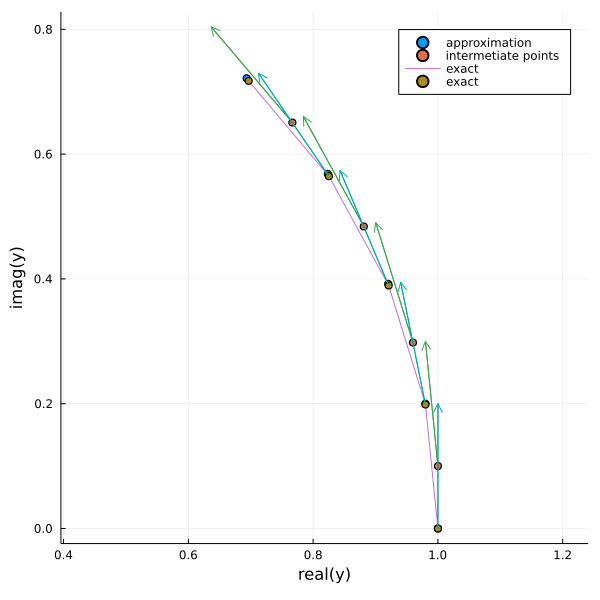

In [5]:
dt = 0.2
N = 5
x = zeros(N)
xint = zeros(N-1)
y = zeros(N)
yint = zeros(N-1)
vx = zeros(N)
vy = zeros(N)
x[1] = 1.0
y[1] = 0.0
for i in 2:N
    vx[i-1] = -dt*y[i-1]
    vy[i-1] = dt*x[i-1]
    xint[i-1] = x[i-1] + vx[i-1]/2
    yint[i-1] = y[i-1] + vy[i-1]/2
    vx[i-1] = -dt*yint[i-1]
    vy[i-1] = dt*xint[i-1]
    x[i] = x[i-1] + vx[i-1]
    y[i] = y[i-1] + vy[i-1]
end
vx[end] = 0.0 #-dt*y[end]
vy[end] = 0.0 #dt*x[end]

plt = scatter(x,y,size=(600,600),
    #xaxis=(0.6,1.01),
    label="approximation", ms=4)
scatter!(plt,xint,yint,label="intermetiate points", ms=4)
quiver!(plt,xint,yint,quiver=(vx,vy))

xe = [cos(dt*(i-1)) for i in 1:N]
ye = [sin(dt*(i-1)) for i in 1:N]
plot!(plt,xe,ye,label="exact",xlabel="real(y)", ylabel="imag(y)", aspectratio=1)
scatter!(plt,xe,ye,label="exact", ms=4)
quiver!(plt,xe[1:end-1],ye[1:end-1],quiver=(-dt*ye[1:end-1],dt*xe[1:end-1]))
current()
#png(plt, "vectorfieldMidPoint")

Alternativamente podríamos haber evolucionado un paso completo $\Delta t$,  para obtener un punto $w^* = w^n + \Delta t f(w^n)$. En este punto aproximado podríamos calcular $f(w^*)$, y luego avanzar nuevamente un paso completo desde $w^n$ usando el valor promedio de $f$. En este caso el esquema resulta:
 
$$
\begin{array}{ll}
k_1 &= \Delta t f(w^n) %\nonumber 
\\
k_2 &= \Delta t f(w^n + k_1) %\nonumber 
\\
w^{n+1} &= w^{n} + \frac{1}{2}(k_1 + k_2) 
%\nonumber 
\end{array}
$$

El cual es llamado *método de Heum*. Ambos métodos tienen errores locales de orden $\Delta t^3$.


En realidad estos no son los únicos métodos con error de tercer orden, existe una familia completa de ellos. Los vamos a describir ahora y al mismo tiempo calcularemos una expresión para acotar el error.
Para encontrarlos comenzaremos con un método genérico que tenga dos evaluaciones de $f$.

$$
\begin{array}{ll}
k_1 &= \Delta t f(w^n) %\nonumber 
\\
k_2 &= \Delta t f(w^n + \alpha_{21} k_1) %\nonumber 
\\
w^{n+1} &= w^{n} + (A_1 k_1 + A_2 k_2) %\nonumber 
\end{array}
$$

El método de punto medio corresponde a las elecciones $\alpha_{21} = \frac{1}{2}$, $(A_1 = 0, A_2 = 1)$, el de Heum a las siguiente  $\alpha = 1$, $(A_1 = \frac{1}{2}, A_2 = \frac{1}{2})$.

Aplicamos expansiones de Taylor a la solución exacta, 

$$
\begin{array}{ll}
y(t_{n+1}) &= y(t_n) + f(y(t_{n})) \Delta t  + \frac{df}{dy}(y)f(y)|_{t=t_n} \frac{\Delta t^2}{2}  + [\frac{d^2f}{dy^2}(y) f^2(y) + (\frac{df}{dy})^2(y)f(y)]|_{t=\zeta} \frac{\Delta t^3}{3!}, %\nonumber 
\end{array}
$$

por otro lado tenemos,

$$
\begin{array}{ll}
w^{n+1} &= w^n + (A_1 k_1 + A_2 k_2) %\nonumber 
\\
&= w^n + A_1 \Delta t f(w^n) + A_2 \Delta t f(w^n + \alpha_{21} k_1 ) %\nonumber 
\\
&= w^n + \Delta t (A_1 f(w^n) + A_2 [f(w^n) + \frac{df}{dy}(w^n)\alpha_{21}\Delta t f(w^n)] )+ O(\Delta t^3)  %\nonumber 
\\
&= w^n + \Delta t  (A_1 + A_2) f(w^n) + A_2\alpha_{21} \frac{df}{dy}(w^n) f(w^n)\Delta t^2 + O(\Delta t^3)  %\nonumber
\end{array}
$$

Comparando ambas expresiones vemos que para tener un error $O(\Delta t^3)$ necesitamos que:

$$
A_1 + A_2 = 1 \;\;\;\;\; A_2 \alpha_{21} = \frac{1}{2}.
$$

Lo que nos da una familia mono-paramétrica (dos condiciones para 3 incognitas) de métodos de tercer orden.


Estos tipos de algoritmos se conocen bajo el nombre de *métodos de Runge Kutta*, son muy eficientes ya que no hay que calcular más que la función en algunos puntos y tienen una gran precisión. 

Entre ellos uno muy usado es el siguiente de $4^{to}$ orden **RK4**: 

```
function RK4(f,w0,t0,h,p)
    k1 = h*f(w0,t0,p)
    k2 = h*f(w0 + k1/2,p)
    k3 = h*f(w0 + k2/2,p)
    k4 = h*f(w0 + k3,p)   
    return w0 + (k1 + 2k2 + 2k3 + k4)/6
end
```


#### Ejercicio:

Aplique este método a nuestra ecuación favorita y escriba el algoritmo resultante, es decir 

$$
w^{n} = A^n w_0
$$

Vea que cuando $\lambda = i$ puede elegir valores de $\Delta t$ de manera que $|A| = 1$.

## Práctica:

En la práctica se usan métodos muy diversos, dependiendo cual es la dificultad de calcular $f$ o sus derivadas. Si estamos frente a problemas conservativos, (órbitas) o disipativos, si $f$ se hace muy grande en algunos lugares (*stiff*), etc.
Si los sistemas son muy grandes (muchas variables) o pequeños (pocas variables), etc.

Hay cientos de métodos distintos, por ejemplo en esta librería hay una gran lista de ellos que han sido implementados [https://diffeq.sciml.ai/stable/solvers/ode_solve/](https://diffeq.sciml.ai/stable/solvers/ode_solve/)

Si no conoce las características del problema conviene comenzar con el más conocido, **RK4**.

También es muy común el uso de algoritmos embebidos. Estos son métodos de RK que al mismo tiempo calculan una aproximación de $4^{to}$ y $5^{to}$ orden. Ello permite conocer el error local con mucha precisión y permite por lo tanto ajustar el paso temporal para tener la precisión requerida por el problema.

## Sistemas

Hasta ahora nos hemos concentrado en los sistemas más simples, es decir donde la variable es única y la función $f$ va de los reales a los reales o de los complejos a los complejos.

En la práctica los problemas que aparecen son bastante más complejos y veremos ahora como tratarlos con los métodos ya introducidos.

#### Ejemplo:

Supongamos que queremos resolver la ecuación que describe el movimiento de una masa suspendida de un resorte.

La fuerza que el resorte ejerce sobre la masa está dada por la ley de Hooke, es decir $F(x) = -kx$. Donde el desplazamiento se cuenta a partir de la posición de equilibrio que se obtiene cuando la fuerza de gravedad (supuesta constante) cancela la tensión del resorte. La constante $k$ es la llamada constante de Hooke y depende solamente de la composición y forma del resorte.  

Si desplazamos la masa una distancia $x_0$ y la soltamos habrá una fuerza de restoración en sentido opuesto, $F(x) = -kx$ la cual generará una aceleración sobre la masa, tenemos así la ecuación:

$$
m\frac{dx^2}{dt^2} = -kx
$$
La resolución de esta ecuación es decir, el encontrar una función $x(t)$ que la satisfaga y que a tiempo $t=0$ valga,

$$
x(0) = x_0 \;\;\;\;\;\;\;\;\;\;\;\; \frac{dx}{dt}|_{t=0} \;\; \text{(se la suelta desde el reposo)}
$$

Nos describiría el fenómeno de oscilaciones que sucedería.

Pero esta ecuación no es de la forma de las que vimos más arriba! Tiene derivadas segundas del tiempo.

Para emplear nuestros métodos la transformaremos en un *sistema de ecuaciones* de primer orden introduciendo la velocidad como una variable más:

$$
\begin{array}{l}
\frac{dx}{dt} &= v \\
\frac{dv}{dt} &= -\frac{k}{m}x
\end{array}
$$

Notemos que si obtenemos una solución de este problema $(x(t), v(t))$ luego,

$$
m\frac{dx^2}{dt^2} = m\frac{dv}{dt} = -kx.
$$

Es decir la $x(t)$ encontrada satisface la ecuación original. Hemos transformado nuestra ecuación diferencial de segundo orden en un sistema de dos ecuaciones diferenciales de primer orden.

Escribiendo,

$$
\vec{y} = (y_1, y_2) = (x,v) \;\;\;\;\;\; y \;\;\;\; \vec{f}(y) = (v,-\frac{k}{m}x) = (y_2, -\frac{k}{m}y_1)
$$

obtenemos el sistema con la forma familiar:

$$
\frac{d\vec{y}}{dt} = \vec{f}(y),
$$ 

pero donde las variables son ahora vectoriales.

#### Ejercicio: 
Constate que $(x(t) = x_0 cos(\omega t)$, $\omega = \sqrt{\frac{k}{m}}$ es la solución buscada. Escriba el vector $\vec{y}$ para esta solución. 




### Interpretació geométrica

Grafiquemos el vector $\vec{f}(y)$ y una solución con $y_0=1$, $\omega = \sqrt{\frac{k}{m}} = 1.4$

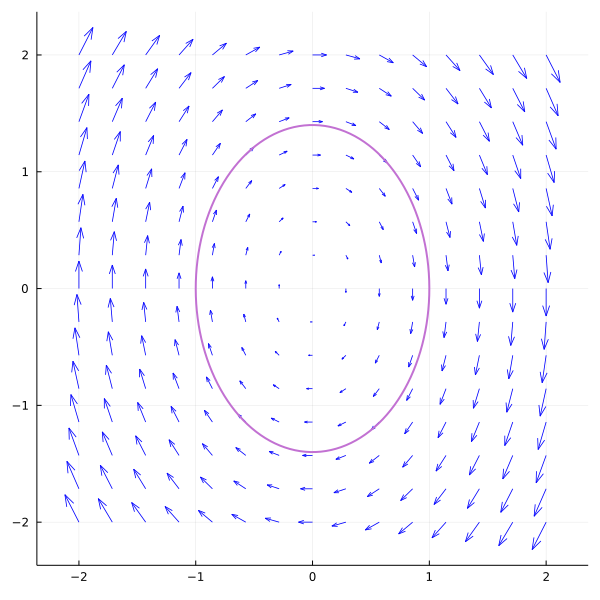

In [8]:
ω = 1.40
scale = 0.2
u_(x, y) = scale * y
v_(x, y) = -ω^2 * scale * x

lims = (-2.2, 2.2)
xs = ys = range(lims...; length=200)
c = 0.3
x = y = range(-2.0, 2.0; length=15)
X, Y = reim(complex.(x', y))        # meshgrid
U, V = c*u_.(x', y), c*v_.(x', y)

gr(legend=false, dpi=600)

# as: arrow head size 0-1 (fraction of arrow length;  la: arrow alpha transparency 0-1
function arrow0!(x, y, u, v; as=0.07, lw=1, lc=:black, la=1)
    nuv = sqrt(u^2 + v^2)
    v1, v2 = [u;v] / nuv,  [-v;u] / nuv
    v4 = (3*v1 + v2)/3.1623  # sqrt(10) to get unit vector
    v5 = v4 - 2*(v4'*v2)*v2
    v4, v5 = as*nuv*v4, as*nuv*v5
    plot!([x,x+u], [y,y+v], lw=lw, lc=lc, la=la)
    plot!([x+u,x+u-v5[1]], [y+v,y+v-v5[2]], lw=lw, lc=lc, la=la)
    plot!([x+u,x+u-v4[1]], [y+v,y+v-v4[2]], lw=lw, lc=lc, la=la)
end

# Alternative to: quiver!(vec(X-U/2), vec(Y-V/2); quiver=(vec(U), vec(V)), color=:red)
# Plot points and arrows with 30% head sizes
plot(label=false, aspectratio=1,size=(600,600))
arrow0!.(X, Y, U, V; as=0.4, lw=0.8,lc=:blue, la=1);
y1e(t) = cos(ω*t)
y2e(t) = -ω * sin(ω*t)
plot!(y1e,y2e , 0, 2π, lw=2, label="y(t)")
Plots.current()
#png("sistemas_2d")

**Vemos que la solución tiene como vector tangente al vector $\vec{f}$!**

*Las soluciones son curvas cuyo vector tangente a cualquier punto a lo largo de ellas es $\vec{f}(y(t))$.*

Si $\vec{f}$ es diferenciable en un entorno de un punto $p$, $U_p$, luego para cualquier $\vec{y}_0 \in U_p$ existirá un intervalo finito $[0,T]$ y una curva $y(t):[0,T] \to U_p$ tal que 

$$
\frac{d\vec{y}}{dt} = \vec{f}(\vec{y}(t)) \;\;\;\; \text{y} \;\; y(0) = y_0
$$

## Sistemas no autónomos

Supongamos ahora que tenemos un sistema donde el campo vectorial $\vec{f}$ no solo depende de $\vec{y}$, sino también de la variable libre, $t$.


$$
\frac{d\vec{y}}{dt}(t) = \vec{f}(\vec{y},t) 
$$
Para este sistema es necesario no solo dar la posición inicial sino también un tiempo inicial, $t_0$, entonces la condición inicial será $\vec{y}(t_0)=y_0$.

Veremos como convertir este sistema en autónomo y así poder aplicar todos los métodos anteriores al mismo.

Consideremos el siguiente sistema:

$$
\begin{array}{ll}
\frac{d\vec{y}}{dt} &= \vec{f}(\vec{y},\lambda) \\
\frac{d\lambda}{dt} &= 1
\end{array}
$$

**Afirmación:** este sistema autónomo es equivalente al anterior si damos como condición inicial $\lambda(t_0) = t_0$

En efecto, supongamos que tenemos una solución de este segundo sistema, es decir un par $(\vec{y}(t), \lambda(t))$
Como la solución de la ecuación para $\lambda$ es $\lambda(t) = t$ $t \in [t_0,T]$, podemos substituir este valor en la ecuación para $\vec{y}(t)$ y así ver que esta satisface:

$$
\frac{d\vec{y}}{dt}(t) = \vec{f}(\vec{y},\lambda) = \vec{f}(\vec{y},t)
$$

Vemos así que ampliando nuestro sistema en una variable ($\lambda$), es decir yendo a un sistema, 

$$
\frac{d}{dt}\left(
    \begin{array}{l}
    \vec{y}\\
    \lambda
    \end{array}
    \right)
    = 
    \left(
    \begin{array}{l}
    \vec{f}(y,\lambda)\\
    1
    \end{array}
    \right)
$$

Podemos tratar todos los sistemas como autónomos.

#### Ejercicio:

Si usamos la estratagema de agrandar el sistema para incluir sistemas no autónomos podemos deducir como es la fórmula para los métodos no autónomos. Por ejemplo, para el método de Heum tendríamos:

$$
\begin{array}{ll}
k_1 &= \Delta t * f(w^n, \lambda^n)  \\
k_1{}_{\lambda} &= \Delta t * 1  \\
k_2 &= \Delta t * f(w^n + k_1, \lambda^n + k_1{}_{\lambda} ) = \Delta t f(w^n + k_1, \lambda^n + \Delta t)  \\
k_2{}_{\lambda} &= \Delta t * 1 \\
w^{n+1} &= w^{n} + \frac{1}{2}(k_1 + k_2) %\nonumber 
\\
\lambda^{n+1} &= \lambda^n + \frac{1}{2}(k_1{}_{\lambda} + k_2{}_{\lambda}) =  \lambda^n + \Delta t
\end{array}
$$

O sea,

$$
\begin{array}{ll}
k_1 &= \Delta t * f(w^n, t^n)  \\
k_2 &= \Delta t f(w^n + k_1, t^n + \Delta t)  \\
w^{n+1} &= w^{n} + \frac{1}{2}(k_1 + k_2) %\nonumber 
\\
t^{n+1} &= t^n + \Delta t
\end{array}
$$

Compruebe que para el método RK4 obtendríamos: ($h=\Delta t$)

```
function RK4(f,w0,t0,h,p)
    k1 = h*f(w0,t0,p)
    k2 = h*f(w0 + k1/2,t0 + h/2,p)
    k3 = h*f(w0 + k2/2,t0 + h/2,p)
    k4 = h*f(w0 + k3,t0 + h,p)   
    return w0 + (k1 + 2k2 + 2k3 + k4)/6
end
```